[2, 4, 5, 5, 0, 0, 0]


In [1]:
from tensorflow import keras
from keras.models import Sequential
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers, applications, Model
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from tensorflow.python.client import device_lib

In [2]:

from google.colab import drive
drive.mount('/content/drive')

!ls "/content/drive/My Drive/JapanZernike"
import sys
sys.path.append('/content/drive/My Drive/JapanZernike')

Mounted at /content/drive
 interfer2   Khorin   magistracy  'magistracy .ipynb'   molecule_gen


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


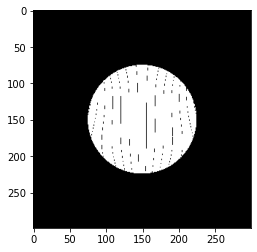

In [11]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

pic = load_img('drive/My Drive/JapanZernike/interfer2/data2/n4m4/_n4m4a0.49_n4m4a0.01_z500_intens.png')
pic_array = img_to_array(pic)

import matplotlib.pyplot as plt

plt.imshow(pic_array)


pic_array.shape # Image dimension

pic_array = pic_array.reshape((1,) + pic_array.shape) # Converting into 4 dimension array
pic_array.shape

# Generate 10 images
# batch_size: At a time, how many image should be created.
count = 0
for batch in datagen.flow(pic_array, batch_size=5,save_to_dir="drive/My Drive/JapanZernike/interfer2/data2/test/", save_prefix='dog', save_format='jpeg'):
    count += 1
    if count > 10:
        break

In [ ]:
#print(tf.__version__)
!pip show tensorflow  # 1.6.0
!ls "/content/drive/My Drive/JapanZernike"
!ls "/content/drive"

Name: tensorflow
Version: 2.4.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: typing-extensions, wrapt, opt-einsum, protobuf, h5py, absl-py, google-pasta, grpcio, termcolor, tensorflow-estimator, wheel, keras-preprocessing, six, flatbuffers, astunparse, gast, tensorboard, numpy
Required-by: fancyimpute
 interfer2   Khorin   magistracy  'magistracy .ipynb'   molecule_gen
MyDrive


In [ ]:
import random
import csv

def add_noise(img):
    '''Add random noise to an image'''
    VARIABILITY = 50
    deviation = VARIABILITY*random.random()
    noise = np.random.normal(0, deviation, img.shape)
    img += noise
    np.clip(img, 0., 255.)
    return img


  #nm_matrix = np.mat("1,1; 2, 0; 2, 2; 3, 1; 3, 3; 4, 0; 4, 2; 4, 4");
nm_matrix = [[1, 1], 
           [2,0], 
           [2,2],
           [3,1],
           [3,3],
           [4,0],
           [4,2],
           [4,4]]
  #alf_1 = 0:0.01:0.5
  
data = [ [ '0' for i in range(9) ] for j in range(3200) ] 
pi = 3.1416
cnt = 0
alf_1 = np.arange(51)
alf_1 = alf_1/100

for idx_1 in range(8):
  for idx_2 in range(8):
    for idx_alf in range(50):
      
      
      
      seq = "n" + str(nm_matrix[idx_1][0]) + "m" + str(nm_matrix[idx_1][1]) + "/_n" + str(nm_matrix[idx_1][0]) + "m" + str(nm_matrix[idx_1][1]) + "a" + str((alf_1[idx_alf])) + "_" + "n" + str(nm_matrix[idx_2][0]) + "m" + str(nm_matrix[idx_2][1]) + "a" + str(round((0.5-alf_1[idx_alf]),2)) + "_z500_intens.png"
      data[cnt][0] = seq
      data[cnt][idx_1+1] = str(alf_1[idx_alf])
      data[cnt][idx_2+1] = str(round((0.5-alf_1[idx_alf]),2))
      cnt = cnt+1
      #filename = "C:\Users\Alex\matlab funcs\Interfer\" + seq;
      
        
csvfile = open('drive/My Drive/JapanZernike/interfer2/csvfile2.csv', 'w')
for row in data:
    line = ','.join(row)
    csvfile.write(line + '\n')  



In [ ]:
import random
import csv

def add_noise(img):
    '''Add random noise to an image'''
    VARIABILITY = 50
    deviation = VARIABILITY*random.random()
    noise = np.random.normal(0, deviation, img.shape)
    img += noise
    np.clip(img, 0., 255.)
    return img



In [ ]:
labels_df = pd.read_csv('drive/My Drive/JapanZernike/interfer2/csvfile2.csv', sep=',', header=None)
print(labels_df.head())
columns = np.delete(np.array(labels_df.columns), 0)
len(labels_df)
print(columns.shape)

                                           0     1    2  ...    6    7    8
0    n1m1/_n1m1a0.0_n1m1a0.5_z500_intens.png  0.50  0.0  ...  0.0  0.0  0.0
1  n1m1/_n1m1a0.01_n1m1a0.49_z500_intens.png  0.49  0.0  ...  0.0  0.0  0.0
2  n1m1/_n1m1a0.02_n1m1a0.48_z500_intens.png  0.48  0.0  ...  0.0  0.0  0.0
3  n1m1/_n1m1a0.03_n1m1a0.47_z500_intens.png  0.47  0.0  ...  0.0  0.0  0.0
4  n1m1/_n1m1a0.04_n1m1a0.46_z500_intens.png  0.46  0.0  ...  0.0  0.0  0.0

[5 rows x 9 columns]
(8,)


In [ ]:
datagen=ImageDataGenerator(rescale=1./255) ########################################################################################################################################
#datagen=ImageDataGenerator(rescale=1./255, rotation_range=45)  # Augmentation by rotation in range 0-45 deg
#datagen=ImageDataGenerator(rescale=1./255, preprocessing_function=add_noise)  # Augmentation by noising

data_len = len(labels_df)
train_data_len = int(0.8*data_len)
test_data_len = int(0.2*data_len)
print(train_data_len)
print(test_data_len)

shuffled_data = shuffle(labels_df)
batch_size = 10


train_generator=datagen.flow_from_dataframe(
dataframe=shuffled_data[:train_data_len],
directory="drive/My Drive/JapanZernike/interfer2/data2",
#directory="drive/My Drive/JapanZernike/magistracy/plots",
#directory="drive/Shared with me/magistracy/plots",
x_col=0,
y_col=columns,
batch_size=batch_size,
seed=42,
shuffle=True,
class_mode="raw",
target_size=(299,299))

test_generator=datagen.flow_from_dataframe(
dataframe=shuffled_data[train_data_len:],
directory="drive/My Drive/JapanZernike/interfer2/data2",
x_col=0,
y_col=columns,
batch_size=batch_size,
seed=42,
shuffle=True,
class_mode="raw",
target_size=(299,299))

train_data_len = 2133 ###############
test_data_len = 541############

2183
545
Found 2141 validated image filenames.
Found 533 validated image filenames.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 42 invalid image filename(s) in x_col="0". These filename(s) will be ignored.
  .format(n_invalid, x_col)
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 13 invalid image filename(s) in x_col="0". These filename(s) will be ignored.
  .format(n_invalid, x_col)


10 (299, 299, 3)
(8,) [0.   0.21 0.   0.   0.29 0.   0.   0.  ]


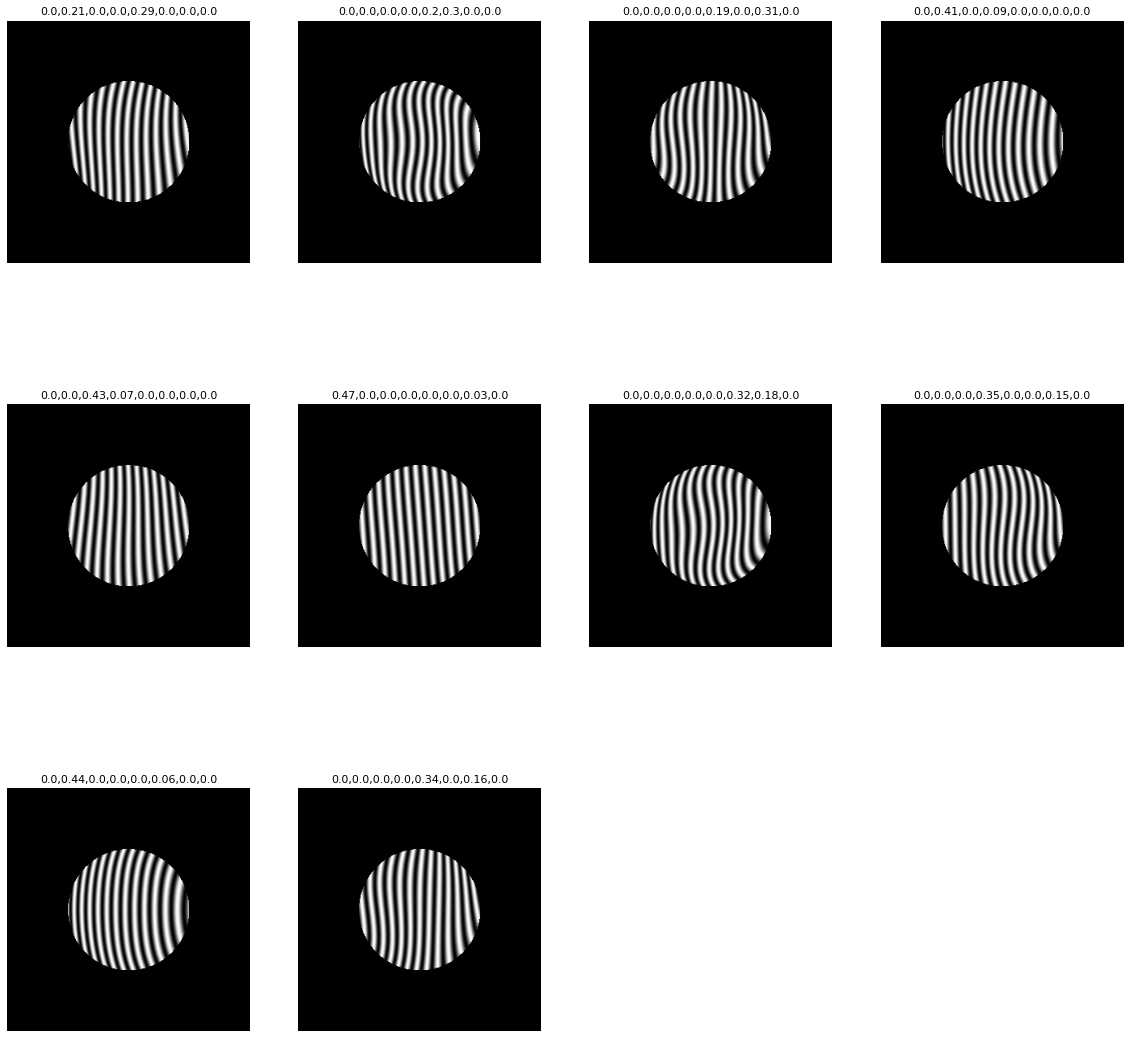

In [ ]:
import matplotlib.pyplot as plt

(x, y) = train_generator.next()
print(len(x), x[0].shape)
print(y[0].shape, y[0])

plt.figure(figsize=(20, 20))
for i, images in enumerate(x):  #train_generator.take(1):
  ax = plt.subplot(3, 4, i + 1)
  plt.imshow(images)
  y_str = ','.join(str(x) for x in y[i])
  plt.title(y_str, fontsize=11)
  plt.axis("off")


In [ ]:
#model = keras.applications.xception.Xception(include_top=True, weights=None, input_tensor=None, input_shape=None, pooling=None)  #, classes=200)
model = keras.applications.MobileNetV2(
    input_shape=None,
    alpha=1.0,
    include_top=True,
    weights=None, #
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
    )


In [ ]:
x = keras.layers.Dropout(0.2)(model.output)
predictions = keras.layers.Dense(len(columns), activation='linear')(x)
print(predictions.shape)

(None, 8)


In [ ]:
my_model = keras.models.Model(inputs = model.input, outputs = predictions)
#my_model = keras.models.load_model('drive/My Drive/JapanZernike/molecule_gen/icml18-jtnn-master/molvae/MPNVAE-h450-L56-d3-beta0.005/model.iter-4')

OSError: ignored

In [ ]:
INIT_LR = 1e-20 #1e-7  #1e-4
EPOCHS = 20

opt = keras.optimizers.Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
#my_model.compile(optimizer=opt, loss='mse', metrics=['mae'])
#my_model.compile(optimizer=opt, loss='mae', metrics=['mae'])
my_model.compile(optimizer=opt, loss='mae', metrics=['accuracy'])

NameError: ignored

In [ ]:
my_model.fit_generator(generator=train_generator, 
                    validation_data=test_generator, 
                    steps_per_epoch=train_data_len // batch_size,  #218.3
                    validation_steps=test_data_len // batch_size,
                    epochs=EPOCHS,
                    verbose=1
                    )

#10 epochs
#normal (1e-5, Xcep, )
#(-3) 0.052-050
#(-7)
#(-5,moblie,ImageNet,softmax,)          loss: 0.0592 - mae: 0.0592 - val_loss: 0.0615 - val_mae: 0.0615   ==>   loss: 0.0375 - mae: 0.0375 - val_loss: 0.0348 - val_mae: 0.0348
#(-5,moblie,None,softmax,)              loss: 0.0596 - mae: 0.0596 - val_loss: 0.0594 - val_mae: 0.0594   ==>   loss: 0.0402 - mae: 0.0402 - val_loss: 0.0380 - val_mae: 0.0380
#imgnet mobile 50--4 50--5 50--7 50--12 loss: 0.0147 - mae: 0.0147 - val_loss: 0.0133 - val_mae: 0.0133   
#standart 50--4 50--5 50--7 50--10      loss: 0.0149 - mae: 0.0149 - val_loss: 0.0132 - val_mae: 0.0132
#none mobile 50--4 50--5 50--7 50--12   loss: 0.0165 - mae: 0.0165 - val_loss: 0.0137 - val_mae: 0.0137   259ms/step - loss: 0.0107 - accuracy: 0.9765 - val_loss: 0.0071 - val_accuracy: 0.9944

NameError: ignored

In [ ]:
predict_generator=datagen.flow_from_dataframe(
dataframe=shuffled_data[train_data_len:],
directory="drive/My Drive/JapanZernike/interfer2/data2",
x_col=0,
y_col=columns,
batch_size=1,
seed = 10, #8,  #15,  #11,  #43,
shuffle=True,
class_mode="raw",
target_size=(299,299))

#my_model.summary()
X,y = predict_generator.next()
pred = my_model.predict(X)
print(y)
print(pred)


NameError: ignored